In [1]:
import konlpy
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from konlpy.tag import Mecab
from wordcloud import WordCloud

In [2]:
# 한국어 tokenizer 중 mecab 사용
mecab = Mecab('/opt/homebrew/lib/mecab/dic/mecab-ko-dic/')

In [3]:
korean_reviews = pd.read_csv('data_extended.csv')
reviews = list(korean_reviews.review)

In [4]:
tokens = []
for sentence in tqdm(reviews):
    tokens.append(mecab.morphs(sentence))

  0%|          | 0/89998 [00:00<?, ?it/s]

In [6]:
# 토큰화 잘 되는지 확인
[mecab.pos(token, join = True)[0] for token in tokens[0]]

['남산/NNG',
 '옆/NNG',
 '이/MM',
 '라/VCP+EC',
 '교통편/NNG',
 '이/MM',
 '불편/NNG',
 '하/VV',
 '지/NNP',
 '않/NNG',
 '아/IC',
 '좋/VA',
 '았/EP',
 '구요/NNG',
 './SF',
 '가/VV+EC',
 '성비/NNG',
 '대비/NNG',
 '좋/VA',
 '았/EP',
 '습니다/EF',
 './SF',
 '호텔/NNG',
 '이/MM',
 '조용/XR',
 '해서/VV+EC',
 '쉬/NNG',
 '기/NNG',
 '좋/VA',
 '았/EP',
 '습니다/EF']

In [7]:
# 리뷰에서 토큰화된 명사만 추출
nouns = []
for sentence in tqdm(reviews):
    nouns.append(mecab.nouns(sentence))

  0%|          | 0/89998 [00:00<?, ?it/s]

In [8]:
# nouns 1차원 리스트로 변환
flat_nouns = [word for sentence in nouns for word in sentence]
len(flat_nouns)

1073181

In [10]:
Counter(flat_nouns).most_common(100)

[('이용', 23609),
 ('친절', 23069),
 ('방', 19352),
 ('시설', 14826),
 ('곳', 13351),
 ('것', 12633),
 ('거', 12251),
 ('만족', 11234),
 ('수', 10987),
 ('객실', 10941),
 ('직원', 10283),
 ('호텔', 9842),
 ('가격', 9824),
 ('다음', 9779),
 ('방문', 9536),
 ('청결', 9387),
 ('숙소', 9374),
 ('때', 9298),
 ('굿', 8223),
 ('사장', 8199),
 ('침대', 6778),
 ('화장실', 6450),
 ('뷰', 6143),
 ('주차', 6093),
 ('위치', 6083),
 ('분', 6076),
 ('여기', 6074),
 ('최고', 6029),
 ('예약', 5995),
 ('게', 5714),
 ('냄새', 5682),
 ('생각', 5289),
 ('시간', 5222),
 ('번', 5209),
 ('상태', 5196),
 ('주변', 4987),
 ('룸', 4867),
 ('감사', 4741),
 ('앞', 4496),
 ('근처', 4475),
 ('정도', 4462),
 ('물', 4423),
 ('성비', 4366),
 ('층', 4343),
 ('불편', 4266),
 ('청소', 4261),
 ('점', 4042),
 ('서비스', 3975),
 ('주차장', 3893),
 ('추천', 3701),
 ('일', 3687),
 ('모텔', 3639),
 ('티비', 3566),
 ('듯', 3538),
 ('숙박', 3533),
 ('데', 3531),
 ('시', 3510),
 ('대비', 3496),
 ('조식', 3468),
 ('편', 3467),
 ('기분', 3357),
 ('여행', 3285),
 ('욕조', 3277),
 ('편의점', 3177),
 ('중', 3171),
 ('사용', 2985),
 ('건', 2973),
 ('

### 문장 단위 분할

모델 학습을 위해서는 리뷰 데이터를 한 문장 단위로 가지고 있어야 합니다.

kss 모듈을 활용하여 리뷰를 문장 단위로 분할하였습니다.

In [11]:
from kss import split_sentences

In [12]:
# review 데이터를 문장 단위로 분할
#sentences = []
#for review in tqdm(reviews):
#    sentences += split_sentences(review)

In [13]:
#sentences_csv = pd.DataFrame(sentences, columns=['리뷰 문장'])
#sentences_csv.to_csv("리뷰 문장.csv", encoding = 'utf-8-sig', index=False)

In [30]:
sentences_csv = pd.read_csv('리뷰 문장.csv', encoding='utf-8-sig') 
sentences_csv.head()

,리뷰 문장
0,남산옆이라 교통편이 불편하지않아 좋았구요.
1,가성비대비 좋았습니다.
2,호텔이 조용해서 쉬기 좋았습니다
3,"안좋은 후기 반 좋은 후기 반이라 반신반의하면서 예약했는데, 결론적으론 괜찮았습니다!"
4,"윗골목에 있어서 역에서 꽤 걸어올라가야 하고, 샤워가운 및 양치도구(샴푸, 린스, ..."


In [19]:
sentence_csv.shape

(308463, 1)

In [24]:
sentences = list(sentence_csv['리뷰 문장'])

In [25]:
# token에서 명사만 추출
sentence_nouns = []
for sentence in tqdm(sentences):
    sentence_nouns.append(mecab.nouns(sentence))


  0%|          | 0/308463 [00:00<?, ?it/s]

### 워드클라우드 그리기

각 단어가 다른 어떤 단어와 많이 연관되어 나오는지 경향성을 워드클라우드로 시각화하였습니다.

In [26]:
def make_wordcloud(word):
    # word를 포함하는 문장만 추출 후 wordcloud 생성
    word_sentences = []
    for sentence in tqdm(sentence_nouns):
        if word in sentence:
            word_sentences.append(sentence)
    word_string = " ".join([" ".join(sentence) for sentence in word_sentences])
    word_frequencies = Counter(word_string.split())
    wordcloud = WordCloud(font_path= './NanumSquareOTF_acR.otf', background_color='white').generate_from_frequencies(word_frequencies)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    return

  0%|          | 0/308463 [00:00<?, ?it/s]

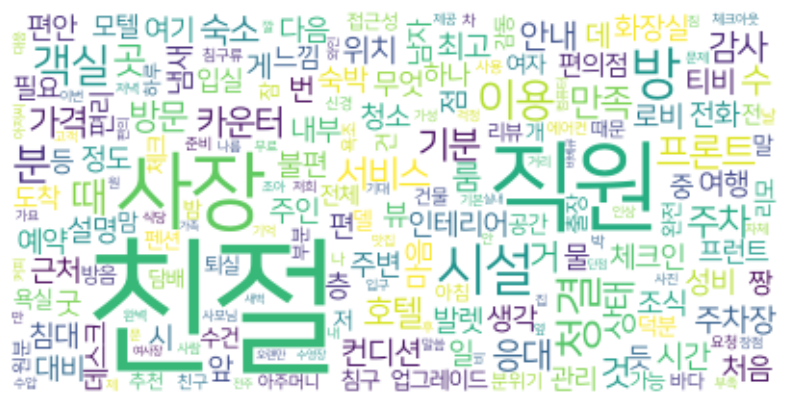

In [27]:
make_wordcloud('친절')

### 전체 문장 중 라벨링할 문장 샘플링

모델 학습을 위해서는 감정이 잘 나타난 문장이 좋을 것이라고 판단하였습니다.

huggingface에서 적절한 모델을 찾아 감성분석을 진행하였습니다.

WhitePeak/bert-base-cased-Korean-sentiment 를 사용하였습니다.

In [28]:
from transformers import pipeline

sentiment_model = pipeline(model="WhitePeak/bert-base-cased-Korean-sentiment")
# 예시
sentiment_model("매우 좋아")

# LABEL_0 : 부정, LABEL_1 : 긍정
# score : 해당 라벨일 확률 (score >= 0.5)

[{'label': 'LABEL_1', 'score': 0.8098210096359253}]

In [50]:
# 문장화가 제대로 되지 않은 리뷰 제거
# 100글자 이상인 리뷰는 정상적으로 분할되지 않은 리뷰라고 판단, 제거했습니다.
# 분할되지 않은 리뷰 예시
print(sentences_csv[sentences_csv['리뷰 문장'].apply(lambda x: len(x) > 100)].iloc[0, 0])

시설-도착 후 건물 외관 확인했는데 그냥저냥        원래 모텔이던 건물을 새로 리모델링한 느낌        호텔에 들어서면 나름 입구에 테라스며 로비며        동남아에 있는 소형 호텔 느낌        로비가 좀 좁은데 식당겸용이라서 갑갑한느낌        그래도 조식 맛있게 잘먹었음


In [51]:
sentences_csv_under100 = sentences_csv[sentences_csv['리뷰 문장'].apply(lambda x: len(x) <= 100)]

In [54]:
# reindex
sentences_csv_under100 = sentences_csv_under100.reset_index(drop=True)

In [56]:
# 30000개의 리뷰에 대해 감정분석 적용
'''
for i in tqdm(range(30000)):
    sentiment = sentiment_model(sentences_csv_under100.loc[i, '리뷰 문장'])[0]
    sentences_csv_under100.loc[i, 'sentiment'] = sentiment['score']
'''

"\nfor i in tqdm(range(30000)):\n    sentiment = sentiment_model(sentences_csv_under100.loc[i, '리뷰 문장'])[0]\n    sentences_csv_under100.loc[i, 'sentiment'] = sentiment['score']\n"

In [57]:
# score가 높은 문장 20000개 추출
# 20000개가 뽑히는 threshold가 0.95655였습니다.
dataset = sentences_csv_under100[sentences_csv_under100.sentiment > 0.95655]
dataset.to_csv("리뷰_문장_감성분석.csv", encoding = 'utf-8-sig', index=False)

In [60]:
# 전체 문장 중 샘플 100개 추출
dataset[:100].to_csv("dataset_sample.csv", encoding = 'utf-8-sig', index=False)